In [1]:
import scipy.interpolate as itp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob,csv
import scipy.io
import netCDF4 as nc
import os
from mpl_toolkits.basemap import addcyclic,Basemap, shiftgrid
import matplotlib.cm as cm
%matplotlib inline

In [2]:
grid=nc.Dataset('/ocean/xiaoxiny/research/data/Jasper/ANHA4_IC_T.nc')
dep=grid.variables['deptht']
depmax=np.max(dep[:])
print dep.shape

(50,)


In [3]:
bath=nc.Dataset('/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bath.variables['Bathymetry'][:]
nav_lon=bath.variables['nav_lon'][:]
nav_lat=bath.variables['nav_lat'][:]
print nav_lon.shape

(800, 544)


In [4]:
def writecsv(j):
    for k in range (len(yinterp2)):
        for num in range(len(dep)):
            depth_min=dep[num]-1;
            depth_max=dep[num]+1;

            if (xvals[k]>depth_min)&(xvals[k]<depth_max):
                layer[num,j]=num;
                NEMO_dep[num,j]=dep[num];
                Real_dep[num,j]=xvals[k];
                z[num,j]=yinterp2[k];
                lons[num,j]=lon[0]
                lats[num,j]=lat[0]

#Vertical Pa part. Interpolation_spline

In [5]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/Pa_part/*.csv'))
print("found *.csv file: \n{}".format(nc_filename))
print len(nc_filename)

total=sorted(glob.glob('/ocean/xiaoxiny/research/data/total/*.csv'))
print("found *.csv file: \n{}".format(total))
print len(total)

a=len(nc_filename)+len(total)
print a
layer=np.empty([len(dep),a])
NEMO_dep=np.empty([len(dep),a])
Real_dep=np.empty([len(dep),a])
lons=np.empty([len(dep),a])
lats=np.empty([len(dep),a])
z=np.empty([len(dep),a])

found *.csv file: 
['/ocean/xiaoxiny/research/data/Pa_part/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_part/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_part/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_part/60changed4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_part/60changed6.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_part/IC_d_p_32_1.csv', '/ocean/xiaoxiny/research/data/Pa_part/abondant_60changed5.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv']
7
found *.csv file: 
['/ocean/xiaoxiny/research/data/total/Total70.csv', '/ocean/xiaoxiny/research/data/total/Total73.csv', '/ocean/xiaoxiny/research/data/total/Total80.csv', '/ocean/xiaoxiny/research/data/total/Total83.csv', '/ocean/xiaoxiny/research/dat

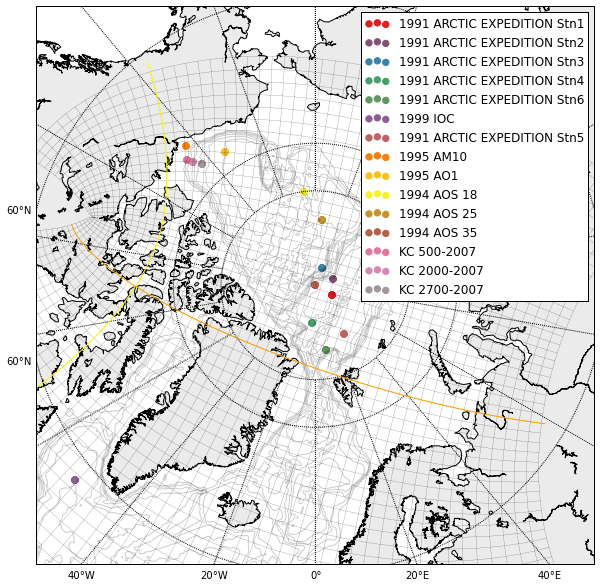

In [8]:
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    y=data['231Pa part.'];
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];

    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat) 

    lon=lon.compressed()
    lat=lat.compressed()
    
    if len(y)!=0:
        ax = plt.figure(1,figsize=(10,10))
        ax.hold(True)
        ax = plt.subplot()
        m = Basemap(projection='npstere',boundinglat=61,lon_0=0,resolution='l')
        xx_lon, yy_lat = m(lon, lat)
        m.scatter(xx_lon,yy_lat,color=cm.Set1(j*18),label=name,s=40)
        
for j in range(len(total)):
    
    data=pd.read_csv(total[j])
    x= data['depth'];
    y=data['231 tot.']*0.1;
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];

    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat) 

    lon=lon.compressed()
    lat=lat.compressed()
    if len(lat)!=0:
        ax = plt.figure(1,figsize=(5,5))
        ax.hold(True)
        ax = plt.subplot()
        xx_lon, yy_lat = m(lon, lat)
        m.scatter(xx_lon,yy_lat,color=cm.Set1((j+len(nc_filename))*18),label=name,s=40)  
    
    if j==0:
        m.drawcoastlines()
        m.fillcontinents(color = '0.85',alpha=0.5)
        m.drawparallels(np.arange(-90.,90.,15.),labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
        x_lon, y_lat = m(nav_lon[:], nav_lat[:])
        plt.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon[::10,::10].T,y_lat[::10,::10].T,color='black',linewidth=0.2,alpha=0.7)
        m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)
        plt.plot(x_lon[:,130],y_lat[:,130],color='yellow')
        plt.plot(x_lon[530,:],y_lat[530,:],color='orange')
plt.legend(loc=0)
plt.show()

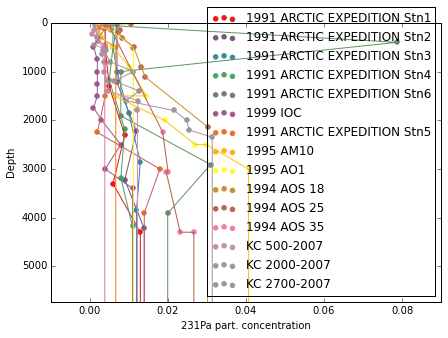

In [15]:
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    x= data['depth'];
    y=data['231Pa part.'];
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y)
    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat)
    
    x=x.compressed()
    y=y.compressed()
    lon=lon.compressed()
    lat=lat.compressed()
    
    xvals=np.linspace(0,depmax,3000)
    yinterp2 = np.interp(xvals, x, y)
    
    ax = plt.figure(1,figsize=(7,5))
    ax.hold(True)
    ax = plt.subplot()#4,4,j+1)
    ax.scatter(y,x, color=cm.Set1(j*20),label=name)
    ax.plot(yinterp2,xvals,color=cm.Set1(j*18))

    if lat[0]>60:
        jmin=530
    if lat[0]<60:
        jmin=350
    for jj in range (jmin,799,1):
        for ii in range (130,543,1):
            if (lon[0]<(nav_lon[jj,ii]+0.35))and(lon[0]>(nav_lon[jj,ii]-0.35)) and(lat[0]<(nav_lat[jj,ii]+0.35))and(lat[0]>(nav_lat[jj,ii]-0.35)):
                h=bathy[jj,ii]
                break
    writecsv(j)
    for k in range (len(dep)):
        if dep[k]>h:
            z[k:len(z),j]=-9.99

    
for j in range(len(total)):
    
    data=pd.read_csv(total[j])
    x= data['depth'];
    y=data['231 tot.']*0.1;
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y)
    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat)
    
    x=x.compressed()
    y=y.compressed()
    lon=lon.compressed()
    lat=lat.compressed()
    
    
    if len(x)!=0:
        xvals=np.linspace(0,depmax,3000)
        yinterp2 = np.interp(xvals, x, y)
        ax = plt.figure(1,figsize=(5,5))
        ax.hold(True)
        ax = plt.subplot()#4,4,j+1)
        ax.scatter(y,x,color=cm.Set1((j+len(nc_filename))*20),label=name)
        #plot2=plt.plot(xvals, yinterp, 'g-.',label='interped values_spline')
        ax.plot(yinterp2,xvals,color=cm.Set1((j+len(nc_filename))*18))
        plt.xlabel('231Pa part. concentration')
        plt.ylabel('Depth')
        plt.ylim([0,depmax])
 
        if lat[0]>60:
            jmin=530
        if lat[0]<60:
            jmin=350
        for jj in range (jmin,799,1):
            for ii in range (130,543,1):
                if (lon[0]<(nav_lon[jj,ii]+0.1))and(lon[0]>(nav_lon[jj,ii]-0.1)) and(lat[0]<(nav_lat[jj,ii]+0.2))and(lat[0]>(nav_lat[jj,ii]-0.2)):
                    h=bathy[jj,ii]
                    break
        writecsv(j+len(nc_filename))
        for k in range (len(dep)):
            if dep[k]>h:
                z[k:len(z),j+len(nc_filename)]=-9.99
    
        plt.legend(loc=0)
plt.gca().invert_yaxis()
scipy.io.savemat('ANHA4_Pa_part',
                 {'layer':layer,'NEMO_dep':NEMO_dep,'Real_dep':Real_dep,'Pa_part':z,'lons':lons,'lats':lats})
plt.show()

#Vertical Pa diss. Interpolation

In [9]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/Pa_diss/*.csv'))
print("found *.csv file: \n{}".format(nc_filename))
print len(nc_filename)

total=sorted(glob.glob('/ocean/xiaoxiny/research/data/total/*.csv'))
print("found *.csv file: \n{}".format(total))
print len(total)

a=len(nc_filename)+len(total)
print a
layer=np.empty([len(dep),a])
NEMO_dep=np.empty([len(dep),a])
Real_dep=np.empty([len(dep),a])
lons=np.empty([len(dep),a])
lats=np.empty([len(dep),a])
z=np.empty([len(dep),a])

found *.csv file: 
['/ocean/xiaoxiny/research/data/Pa_diss/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_diss/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_diss/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_diss/60changed4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_diss/60changed6.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_diss/IC_d_1_ref5.csv', '/ocean/xiaoxiny/research/data/Pa_diss/IC_d_p_32_1.csv', '/ocean/xiaoxiny/research/data/Pa_diss/abundant_60changed5.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv']
8
found *.csv file: 
['/ocean/xiaoxiny/research/data/total/Total70.csv', '/ocean/xiaoxiny/research/data/total/Total73.csv', '/ocean/xiaoxiny/research/data/total/Total80.csv', '/ocean/xiaoxiny/resear

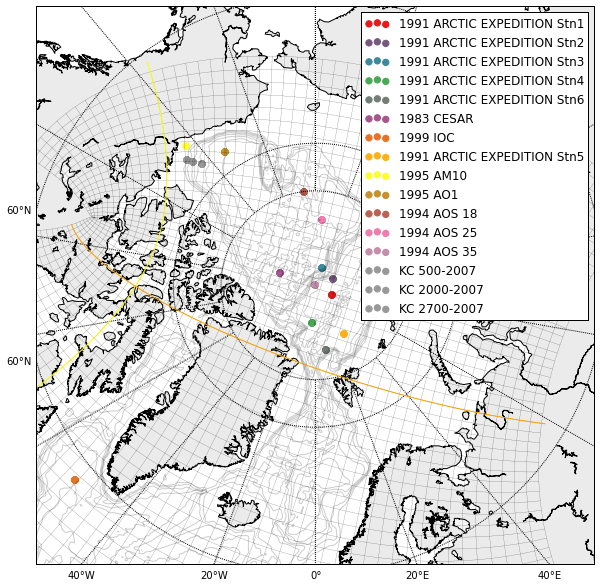

In [11]:
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    y=data['231Pa diss.'];
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];
    

    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat) 

    lon=lon.compressed()
    lat=lat.compressed()
    
    if len(y)!=0:
        ax = plt.figure(1,figsize=(10,10))
        ax.hold(True)
        ax = plt.subplot()
        m = Basemap(projection='npstere',boundinglat=61,lon_0=0,resolution='l')
        xx_lon, yy_lat = m(lon, lat)
        m.scatter(xx_lon,yy_lat,color=cm.Set1(j*20),label=name,s=40)
        
for j in range(len(total)):
    
    data=pd.read_csv(total[j])
    x= data['depth'];
    y=data['231 tot.']*0.9;
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];
    

    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat) 

    lon=lon.compressed()
    lat=lat.compressed()
    if len(lat)!=0:
        ax = plt.figure(1,figsize=(5,5))
        ax.hold(True)
        ax = plt.subplot()
        xx_lon, yy_lat = m(lon, lat)
        m.scatter(xx_lon,yy_lat,color=cm.Set1((j+len(nc_filename))*20),label=name,s=40)  
    
    if j==0:
        m.drawcoastlines()
        m.fillcontinents(color = '0.85',alpha=0.5)
        m.drawparallels(np.arange(-90.,90.,15.),labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
        x_lon, y_lat = m(nav_lon[:], nav_lat[:])
        plt.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon[::10,::10].T,y_lat[::10,::10].T,color='black',linewidth=0.2,alpha=0.7)
        m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)
        plt.plot(x_lon[:,130],y_lat[:,130],color='yellow')
        plt.plot(x_lon[530,:],y_lat[530,:],color='orange')
plt.legend(loc=0)
plt.show()

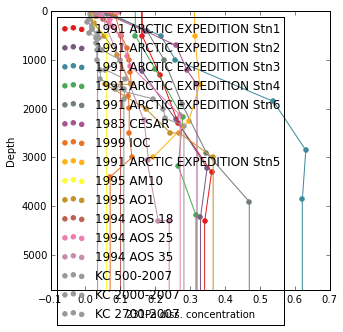

In [38]:
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    x= data['depth'];
    y=data['231Pa diss.'];
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];
    
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y)
    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat)
    #print lon[0]
    #print lat[0]
    
    x=x.compressed()
    y=y.compressed()
    lon=lon.compressed()
    lat=lat.compressed()
    
    xvals=np.linspace(0,depmax,3000)
    yinterp2 = np.interp(xvals, x, y)
    
    ax = plt.figure(1,figsize=(5,5))
    ax.hold(True)
    ax = plt.subplot()#4,4,j+1)
    ax.scatter(y,x, color=cm.Set1(j*20),label=name)
    ax.plot(yinterp2,xvals,color=cm.Set1(j*20))

    if lat[0]>60 or lat[0]==60:
        jmin=530
    if lat[0]<60:
        jmin=350
    for jj in range (jmin,799,1):
        for ii in range (130,543,1):
            if (lat[0]<(nav_lat[jj,ii]+0.4))and(lat[0]>(nav_lat[jj,ii]-0.4))and(lon[0]<(nav_lon[jj,ii]+0.2))and(lon[0]>(nav_lon[jj,ii]-0.2)):
                h=bathy[jj,ii]                    
                break
    writecsv(j)
    for k in range (len(dep)):
        if dep[k]>h:
            z[k:len(z),j]=-9.99
            
for j in range(len(total)):  
    data=pd.read_csv(total[j])
    x= data['depth'];
    y=data['231 tot.']*0.9;
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];
    
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y)
    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat)
    
    x=x.compressed()
    y=y.compressed()
    lon=lon.compressed()
    lat=lat.compressed()
    
    
    if len(x)!=0:
        xvals=np.linspace(0,depmax,3000)
        yinterp2 = np.interp(xvals, x, y)
        ax = plt.figure(1,figsize=(5,5))
        ax.hold(True)
        ax = plt.subplot()#4,4,j+1)
        ax.scatter(y,x,color=cm.Set1((j+len(nc_filename))*20),label=name)
        #plot2=plt.plot(xvals, yinterp, 'g-.',label='interped values_spline')
        ax.plot(yinterp2,xvals,color=cm.Set1((j+len(nc_filename))*20))
        plt.xlabel('231Pa diss. concentration')
        plt.ylabel('Depth')
        plt.ylim([0,depmax])
 
        if lat[0]>60:
            jmin=530
        if lat[0]<60:
            jmin=350
        for jj in range (jmin,799,1):
            for ii in range (130,543,1):
                if (lon[0]<(nav_lon[jj,ii]+0.2))and(lon[0]>(nav_lon[jj,ii]-0.2)) and(lat[0]<(nav_lat[jj,ii]+0.2))and(lat[0]>(nav_lat[jj,ii]-0.2)):
                    h=bathy[jj,ii]
                    break
        writecsv(j+len(nc_filename))
        for k in range (len(dep)):
            if dep[k]>h:
                z[k:len(dep),j+len(nc_filename)]=-9.99
    
plt.legend(loc=0)
plt.gca().invert_yaxis()
scipy.io.savemat('ANHA4_Pa_diss',
                 {'layer':layer,'NEMO_dep':NEMO_dep,'Real_dep':Real_dep,'Pa_diss':z,'lons':lons,'lats':lats})
plt.show()

#Vertical Th part. Interpolation

In [12]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/Th_part/*.csv'))
print("found *.csv file: \n{}".format(nc_filename))
print len(nc_filename)

total=sorted(glob.glob('/ocean/xiaoxiny/research/data/total/*.csv'))
print("found *.csv file: \n{}".format(total))
print len(total)

a=len(nc_filename)+len(total)
print a
layer=np.empty([len(dep),a])
NEMO_dep=np.empty([len(dep),a])
Real_dep=np.empty([len(dep),a])
lons=np.empty([len(dep),a])
lats=np.empty([len(dep),a])
z=np.empty([len(dep),a])

found *.csv file: 
['/ocean/xiaoxiny/research/data/Th_part/1_ref5.csv', '/ocean/xiaoxiny/research/data/Th_part/23_1.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/23_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/23_3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/23_4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/60changed4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/60changed5.Th-Pa_data_July2012-Oce

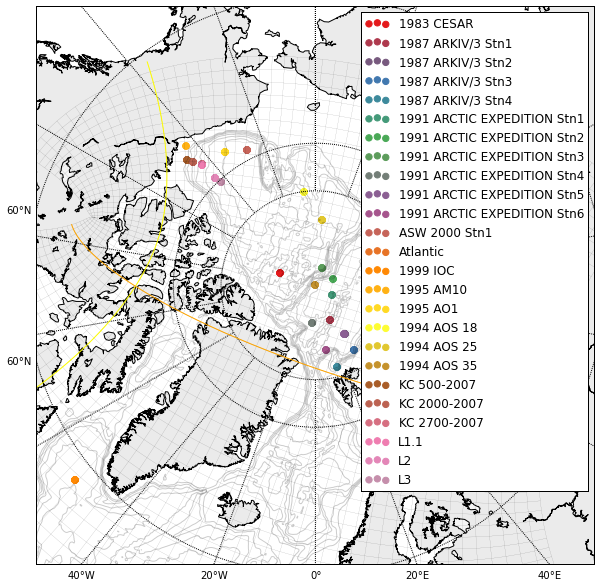

In [13]:
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    y=data['230Th part.'];
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];

    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat) 
    lon=lon.compressed()
    lat=lat.compressed()
    
    if len(x)!=0:
        ax = plt.figure(1,figsize=(10,10))
        ax.hold(True)
        ax = plt.subplot()
        m = Basemap(projection='npstere',boundinglat=61,lon_0=0,resolution='l')
        xx_lon, yy_lat = m(lon, lat)
        m.scatter(xx_lon,yy_lat,color=cm.Set1(j*10),label=name,s=40)
        
for j in range(len(total)):
    
    data=pd.read_csv(total[j])
    y=data['230Th tot.']*0.1;
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];

    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat) 
    lon=lon.compressed()
    lat=lat.compressed()
    
    if len(lat)!=0:
        ax = plt.figure(1,figsize=(10,10))
        ax.hold(True)
        ax = plt.subplot()
        xx_lon, yy_lat = m(lon, lat)
        m.scatter(xx_lon,yy_lat,color=cm.Set1((j+len(nc_filename))*10),label=name,s=40)      
    if j==0:
        m.drawcoastlines()
        m.fillcontinents(color = '0.85',alpha=0.5)
        m.drawparallels(np.arange(-90.,90.,15.),labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
        x_lon, y_lat = m(nav_lon[:], nav_lat[:])
        plt.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon[::10,::10].T,y_lat[::10,::10].T,color='black',linewidth=0.1,alpha=0.7)
        m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)
        plt.plot(x_lon[:,130],y_lat[:,130],color='yellow')
        plt.plot(x_lon[530,:],y_lat[530,:],color='orange')
plt.legend(loc=0)
plt.show()

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


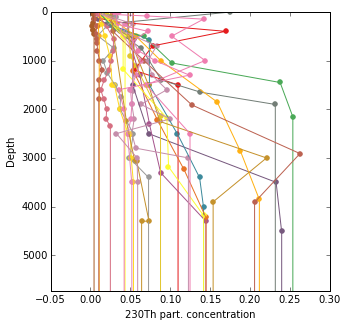

In [31]:
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    x= data['depth'];
    y=data['230Th part.'];
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y)
    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat)
    
    x=x.compressed()
    y=y.compressed()
    lon=lon.compressed()
    lat=lat.compressed()
    
    xvals=np.linspace(0,depmax,3000)
    yinterp2 = np.interp(xvals, x, y)
    
    ax = plt.figure(1,figsize=(5,5))
    ax.hold(True)
    ax = plt.subplot()#4,4,j+1)
    ax.scatter(y,x, color=cm.Set1(j*20))
    ax.plot(yinterp2,xvals,color=cm.Set1(j*20))

    if lat[0]>60:
        jmin=530
    if lat[0]<60:
        jmin=350
    for jj in range (jmin,799,1):
        for ii in range (130,543,1):
            if (lon[0]<(nav_lon[jj,ii]+0.2))and(lon[0]>(nav_lon[jj,ii]-0.2)) and(lat[0]<(nav_lat[jj,ii]+0.2))and(lat[0]>(nav_lat[jj,ii]-0.2)):
                h=bathy[jj,ii]
                break
#            else:
#                if (lon[0]<(nav_lon[jj,ii]+0.5))and(lon[0]>(nav_lon[jj,ii]-0.5)) and(lat[0]<(nav_lat[jj,ii]+0.2))and(lat[0]>(nav_lat[jj,ii]-0.2)):
#                    h=bathy[jj,ii]
#                    break
    writecsv(j)
    for k in range (len(dep)):
        if dep[k]>h:
            z[k:len(dep),j]=-9.99

    
for j in range(len(total)):
    
    data=pd.read_csv(total[j])
    x= data['depth'];
    y=data['230Th tot.']*0.1;
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y)
    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat)
    
    x=x.compressed()
    y=y.compressed()
    lon=lon.compressed()
    lat=lat.compressed()
    
    
    if len(x)!=0:
        xvals=np.linspace(0,depmax,3000)
        yinterp2 = np.interp(xvals, x, y)
        ax = plt.figure(1,figsize=(5,5))
        ax.hold(True)
        ax = plt.subplot()#4,4,j+1)
        ax.scatter(y,x,color=cm.Set1((j+len(nc_filename))*10))
        #plot2=plt.plot(xvals, yinterp, 'g-.',label='interped values_spline')
        ax.plot(yinterp2,xvals,color=cm.Set1((j+len(nc_filename))*10))
        plt.xlabel('230Th part. concentration')
        plt.ylabel('Depth')
        plt.ylim([0,depmax])
 
        if lat[0]>60:
            jmin=530
        if lat[0]<60:
            jmin=350
        for jj in range (jmin,799,1):
            for ii in range (130,543,1):
                if (lon[0]<(nav_lon[jj,ii]+0.1))and(lon[0]>(nav_lon[jj,ii]-0.1)) and(lat[0]<(nav_lat[jj,ii]+0.2))and(lat[0]>(nav_lat[jj,ii]-0.2)):
                    h=bathy[jj,ii]
                    break
        writecsv(j+len(nc_filename))
        for k in range (len(dep)):
            if dep[k]>h:
                z[k:len(dep),j+len(nc_filename)]=-9.99
    
plt.legend(loc=0)
plt.gca().invert_yaxis()
scipy.io.savemat('ANHA4_Th_part',
                 {'layer':layer,'NEMO_dep':NEMO_dep,'Real_dep':Real_dep,'Th_part':z,'lons':lons,'lats':lats})
plt.show()

#Vertical Th diss. Interpolation

In [14]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/Th_diss/*.csv'))
print("found *.csv file: \n{}".format(nc_filename))
print len(nc_filename)

total=sorted(glob.glob('/ocean/xiaoxiny/research/data/total/*.csv'))
print("found *.csv file: \n{}".format(total))
print len(total)

a=len(nc_filename)+len(total)
print a
layer=np.empty([len(dep),a])
NEMO_dep=np.empty([len(dep),a])
Real_dep=np.empty([len(dep),a])
lons=np.empty([len(dep),a])
lats=np.empty([len(dep),a])
z=np.empty([len(dep),a])

found *.csv file: 
['/ocean/xiaoxiny/research/data/Th_diss/1_ref5.csv', '/ocean/xiaoxiny/research/data/Th_diss/23_1.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/23_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/23_3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/23_4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/60changed4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/60changed5.Th-Pa_data_July2012-Oce

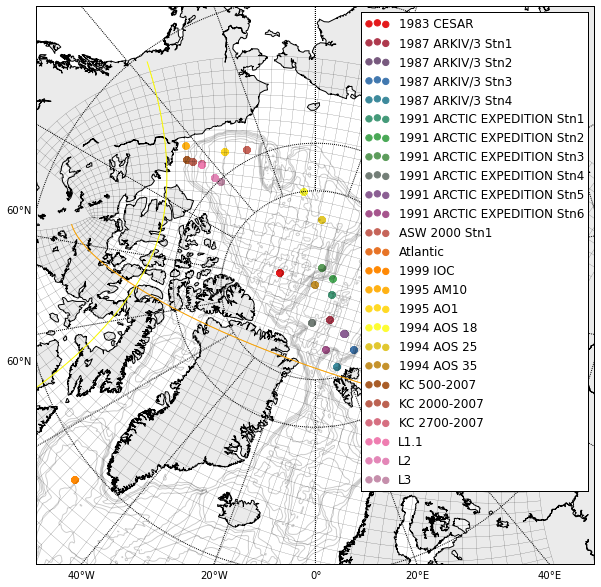

In [15]:
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    y=data['230Th diss.'];
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];

    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat) 
    lon=lon.compressed()
    lat=lat.compressed()
    
    if len(x)!=0:
        ax = plt.figure(1,figsize=(10,10))
        ax.hold(True)
        ax = plt.subplot()
        m = Basemap(projection='npstere',boundinglat=61,lon_0=0,resolution='l')
        xx_lon, yy_lat = m(lon, lat)
        m.scatter(xx_lon,yy_lat,color=cm.Set1(j*10),label=name,s=40)
        
for j in range(len(total)):
    
    data=pd.read_csv(total[j])
    y=data['230Th tot.']*0.9;
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];

    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat) 
    lon=lon.compressed()
    lat=lat.compressed()
    
    if len(lat)!=0:
        ax = plt.figure(1,figsize=(5,5))
        ax.hold(True)
        ax = plt.subplot()
        xx_lon, yy_lat = m(lon, lat)
        m.scatter(xx_lon,yy_lat,color=cm.Set1((j+len(nc_filename))*10),label=name,s=40)      
    if j==0:
        m.drawcoastlines()
        m.fillcontinents(color = '0.85',alpha=0.5)
        m.drawparallels(np.arange(-90.,90.,15.),labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
        x_lon, y_lat = m(nav_lon[:], nav_lat[:])
        plt.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon[::10,::10].T,y_lat[::10,::10].T,color='black',linewidth=0.2,alpha=0.7)
        m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)
        plt.plot(x_lon[:,130],y_lat[:,130],color='yellow')
        plt.plot(x_lon[530,:],y_lat[530,:],color='orange')
plt.legend(loc=0)
plt.show()

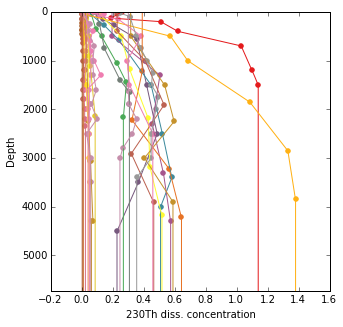

In [34]:
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    x= data['depth'];
    y=data['230Th diss.'];
    lon = data['long.'];
    lat = data['lat.'];
    #name= data['name'];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y)
    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat)
    
    x=x.compressed()
    y=y.compressed()
    lon=lon.compressed()
    lat=lat.compressed()
    
    xvals=np.linspace(0,depmax,3000)
    yinterp2 = np.interp(xvals, x, y)
    
    ax = plt.figure(1,figsize=(5,5))
    ax.hold(True)
    ax = plt.subplot()#4,4,j+1)
    ax.scatter(y,x, color=cm.Set1(j*20))
    ax.plot(yinterp2,xvals,color=cm.Set1(j*20))

    if lat[0]>60:
        jmin=530
    if lat[0]<60:
        jmin=350
    for jj in range (jmin,799,1):
        for ii in range (130,543,1):
            if (lon[0]<(nav_lon[jj,ii]+0.1))and(lon[0]>(nav_lon[jj,ii]-0.1)) and(lat[0]<(nav_lat[jj,ii]+0.2))and(lat[0]>(nav_lat[jj,ii]-0.2)):
                h=bathy[jj,ii]
                break
    writecsv(j)
    for k in range (len(dep)):
        if dep[k]>h:
            z[k:len(z),j]=-9.99

    
for j in range(len(total)):
    
    data=pd.read_csv(total[j])
    x= data['depth'];
    y=data['230Th tot.']*0.1;
    lon = data['long.'];
    lat = data['lat.'];
    #name= data['name'];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y)
    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat)
    
    x=x.compressed()
    y=y.compressed()
    lon=lon.compressed()
    lat=lat.compressed()
    
    
    if len(x)!=0:
        xvals=np.linspace(0,depmax,3000)
        yinterp2 = np.interp(xvals, x, y)
        ax = plt.figure(1,figsize=(5,5))
        ax.hold(True)
        ax = plt.subplot()#4,4,j+1)
        ax.scatter(y,x,color=cm.Set1((j+len(nc_filename))*10))
        #plot2=plt.plot(xvals, yinterp, 'g-.',label='interped values_spline')
        ax.plot(yinterp2,xvals,color=cm.Set1((j+len(nc_filename))*10))
        plt.xlabel('230Th diss. concentration')
        plt.ylabel('Depth')
        plt.ylim([0,depmax])
 
        if lat[0]>60:
            jmin=530
        if lat[0]<60:
            jmin=350
        for jj in range (jmin,799,1):
            for ii in range (130,543,1):
                if (lon[0]<(nav_lon[jj,ii]+0.1))and(lon[0]>(nav_lon[jj,ii]-0.1)) and(lat[0]<(nav_lat[jj,ii]+0.2))and(lat[0]>(nav_lat[jj,ii]-0.2)):
                    h=bathy[jj,ii]
                    break
        writecsv(j+len(nc_filename))
        for k in range (len(dep)):
            if dep[k]>h:
                z[k:len(z),j+len(nc_filename)]=-9.99
    
#plt.legend(loc=0)
plt.gca().invert_yaxis()
scipy.io.savemat('ANHA4_Th_diss',
                 {'layer':layer,'NEMO_dep':NEMO_dep,'Real_dep':Real_dep,'Th_diss':z,'lons':lons,'lats':lats})
plt.show()

#load data

In [16]:
Th_diss_data=scipy.io.loadmat('ANHA4_Pa_part.mat')
layer=Th_diss_data['Pa_part']
print layer

[[  4.00000000e-003   7.00000000e-003   7.00000000e-003   6.00000000e-003
    4.00000000e-003   3.00000000e-003   4.00000000e-003   2.30000000e-003
    1.70000000e-003   2.00000000e-003   1.06000000e-002   5.30000000e-003
    3.47211230e-003   2.01348110e-003   1.33225080e-003   9.88131292e-323
    6.92251143e-310   4.94065646e-324]
 [  4.00000000e-003   7.00000000e-003   7.00000000e-003   6.00000000e-003
    4.00000000e-003   3.00000000e-003   4.00000000e-003   2.30000000e-003
    1.70000000e-003   2.00000000e-003   1.06000000e-002   5.30000000e-003
    3.47211230e-003   2.01348110e-003   1.33225080e-003   1.93795827e-316
    9.88131292e-323   6.92251920e-310]
 [  4.00000000e-003   7.00000000e-003   7.00000000e-003   6.00000000e-003
    4.00000000e-003   3.00000000e-003   4.00000000e-003   2.30000000e-003
    1.70000000e-003   2.00000000e-003   1.06000000e-002   5.30000000e-003
    3.47211230e-003   2.01348110e-003   1.33225080e-003   0.00000000e+000
    6.91691904e-323   1.93794839e-